#Business Understanding


#Data Understanding

#Gather Data

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read schema data
df_schema = pd.read_csv('../data/survey_results_schema.csv')

In [3]:
# Read survey data
df_data = pd.read_csv('../data/survey_results_public.csv')

#Assess Data

In [4]:
# Take a look at the first rows in the survey schema
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
# Take a look at the first rows in the survey data
df_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show sum of NaN values per feature
df_data.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [7]:
# Give an overview of the survey data both 
# for categorical and numerical features
df_data.describe(include='all')

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,51392.000000,51392,51392,51392,51392,51392,51392,42841,44008,38922,...,31062,35047,34938,33033,34720,34536,34419,34612,12891.000000,2566.000000
unique,NaN,5,4,201,4,7,9,16,7,10,...,5,29,10,97,5,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
freq,NaN,36131,24801,11455,37543,36148,21609,21409,15454,8587,...,18200,31589,10175,23415,11257,16061,20955,14603,NaN,NaN
mean,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56298.480641,33142.220468
std,14835.736854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39880.905277,30162.988829
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,12848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26440.371839,4490.492484
50%,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,29364.263691
75%,38544.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000.000000,50403.225806


#1. Which countries show the highest and lowest job and career satisfaction?

##Prepare data for question 1

In [8]:
# Have a look at the JobSatisfaction column
df_data['JobSatisfaction'].value_counts(dropna=False)


NaN     11016
8.0      8983
7.0      7969
9.0      5573
6.0      4726
10.0     4148
5.0      3749
4.0      1865
3.0      1635
2.0       888
0.0       467
1.0       373
Name: JobSatisfaction, dtype: int64

In [9]:
# Have a look at the CareerSatisfaction column
df_data['CareerSatisfaction'].value_counts(dropna=False)

8.0     11037
7.0      9384
NaN      8697
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [10]:
# Drop those rows where JobSatisfaction, CareerSatisfaction
# or Country column is NaN because replacing these values
# is not suitable in this case
df_q1 = df_data[['Country', 'JobSatisfaction', 'CareerSatisfaction']].copy()
df_q1 = df_q1.dropna(axis=0)
df_q1 = df_q1.drop(df_q1[df_q1['Country'] == 'I prefer not to say'].index)
df_q1['Country'].unique(), df_q1['JobSatisfaction'].unique(), df_q1['CareerSatisfaction'].unique()

(array(['United Kingdom', 'United States', 'Switzerland', 'Poland',
        'Colombia', 'France', 'Canada', 'Germany', 'Greece', 'Brazil',
        'Israel', 'Italy', 'Belgium', 'India', 'Chile', 'Croatia',
        'Argentina', 'Netherlands', 'Denmark', 'Ukraine', 'Sri Lanka',
        'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria', 'Mexico',
        'Uruguay', 'Estonia', 'Iran', 'Bangladesh', 'Sweden', 'Lithuania',
        'Russian Federation', 'Costa Rica', 'Serbia', 'Slovenia',
        'United Arab Emirates', 'Tunisia', 'El Salvador', 'Norway',
        'Romania', 'Belarus', 'Czech Republic', 'Portugal', 'Albania',
        'South Africa', 'New Zealand', 'Uzbekistan', 'Ireland', 'Nepal',
        'Hungary', 'Kenya', 'Australia', 'Japan', 'Pakistan', 'Luxembourg',
        'Bolivia', 'Vietnam', 'Slovak Republic', 'Saudi Arabia',
        'Ethiopia', 'Macedonia', 'Bulgaria', 'Bosnia-Herzegovina',
        'Algeria', 'Nicaragua', 'Cuba', 'Indonesia',
        'Netherlands Antilles', 'Jamai

In [11]:
# Engineer an additional feature with the mean of
# both JobSatisfaction and CareerSatisfaction
df_q1 = pd.concat(
    [
        df_q1,
        ((df_q1['JobSatisfaction'] + df_q1['CareerSatisfaction']) / 2).rename(
            'CombinedSatisfaction'
        ),
    ],
    axis=1,
)

In [12]:
# Drop those countries with less than 100 respondents
# to avoid statiscally insignificant entries
country_count = df_q1['Country'].value_counts()
country_count = country_count[country_count >= 100]
list_country_keep = list(country_count.index)
df_q1 = df_q1[df_q1['Country'].isin(list_country_keep)]

In [13]:
# Compute the mean per country of columns
# CareerSatisfaction, JobSatisfaction, and
# CombinedSatisfaction.
df_q1 = df_q1.groupby(['Country']).agg(
    {
        'CareerSatisfaction': ['mean'],
        'JobSatisfaction': ['mean'],
        'CombinedSatisfaction': ['mean'],
    }
)
# Rename columns
df_q1.columns = ['career_mean', 'job_mean', 'combined_mean']
# Sort by mean CombinedSatisfaction
df_q1 = df_q1.sort_values('combined_mean', ascending=True)
df_q1.head()

,career_mean,job_mean,combined_mean
Country,,,
Japan,6.235294,5.828431,6.031863
India,6.713117,6.162576,6.437846
Bangladesh,6.834646,6.228346,6.531496
China,6.649718,6.429379,6.539548
South Korea,6.672897,6.457944,6.565421


##Plot results for question 1

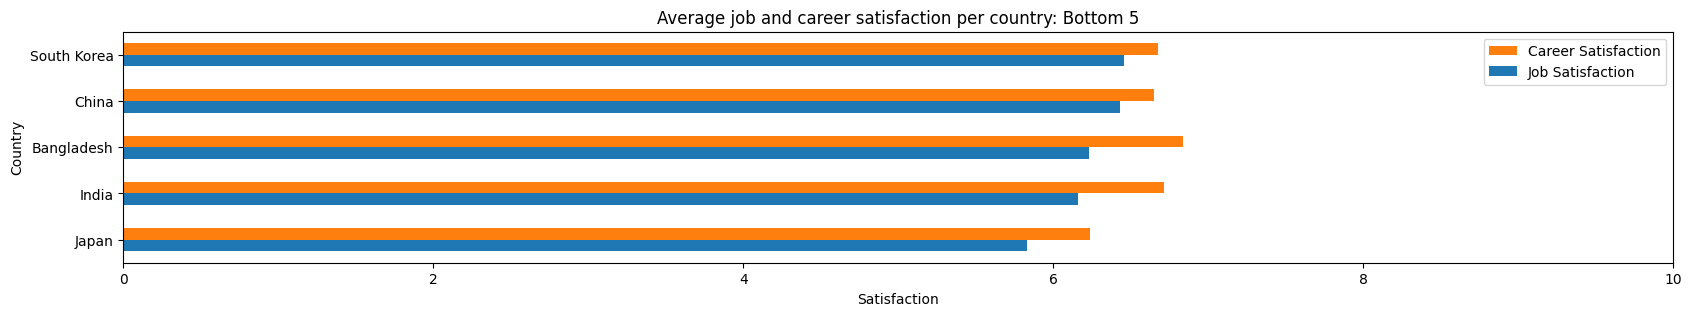

In [14]:
# Plot bottom 5 countries
fig, ax = plt.subplots()
df_q1[['job_mean', 'career_mean']][:5].plot(
    kind='barh',
    ylabel='Country',
    xlabel='Satisfaction',
    title='Average job and career satisfaction per country: Bottom 5',
    xlim=[0, 10],
    figsize=[20, 3],
    ax=ax,
)
ax.legend(
    reversed(ax.legend().legendHandles), ['Career Satisfaction', 'Job Satisfaction']
)

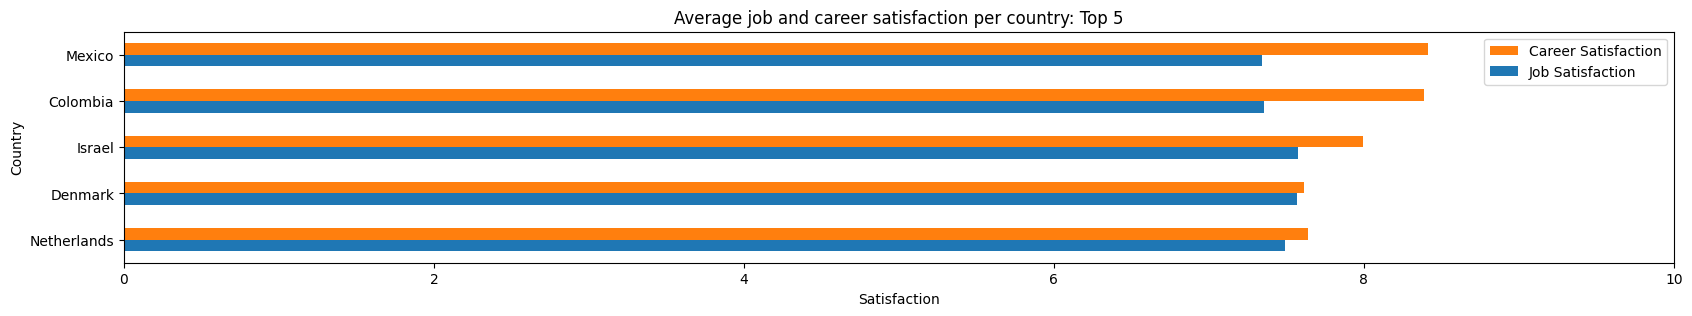

In [15]:
# Plot top 5 countries
fig, ax = plt.subplots()
df_q1[['job_mean', 'career_mean']][-5:].plot(
    kind='barh',
    ylabel='Country',
    xlabel='Satisfaction',
    title='Average job and career satisfaction per country: Top 5',
    xlim=[0, 10],
    figsize=[20, 3],
    ax=ax,
)
ax.legend(
    reversed(ax.legend().legendHandles), ['Career Satisfaction', 'Job Satisfaction']
)

##Conclusion for question 1

#2. 

##Prepare data for question 2

In [38]:
# 
df_q2 = df_data.filter(regex=('^AssessJob.*|Country'))
df_q2.isnull().sum(), df_q2.shape

(Country                      0
 AssessJobIndustry        29262
 AssessJobRole            29245
 AssessJobExp             29256
 AssessJobDept            29269
 AssessJobTech            29203
 AssessJobProjects        29209
 AssessJobCompensation    29246
 AssessJobOffice          29388
 AssessJobCommute         29419
 AssessJobRemote          29372
 AssessJobLeaders         29406
 AssessJobProfDevel       29394
 AssessJobDiversity       29414
 AssessJobProduct         29395
 AssessJobFinances        29369
 dtype: int64,
 (51392, 16))

In [39]:
# 
df_q2.columns

Index(['Country', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp',
       'AssessJobDept', 'AssessJobTech', 'AssessJobProjects',
       'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute',
       'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel',
       'AssessJobDiversity', 'AssessJobProduct', 'AssessJobFinances'],
      dtype='object')

In [40]:
#
df_q2.columns = [
    'Country',
    'Industry',
    'Job Title',
    'Experience level',
    'Department',
    'Used technologies',
    'Project management',
    'Compensation',
    'Office environment',
    'Commuting duration',
    'Remote work',
    'Reputation of leaders',
    'Professional development',
    'Diversity',
    'Impact of product',
    'Funding status',
]

In [41]:
# 
df_q2 = df_q2.dropna(
    axis=0
)
df_q2.isnull().sum(), df_q2.shape

(Country                     0
 Industry                    0
 Job Title                   0
 Experience level            0
 Department                  0
 Used technologies           0
 Project management          0
 Compensation                0
 Office environment          0
 Commuting duration          0
 Remote work                 0
 Reputation of leaders       0
 Professional development    0
 Diversity                   0
 Impact of product           0
 Funding status              0
 dtype: int64,
 (20661, 16))

In [42]:
# 
df_q2.replace(
    [
        'Not very important',
        'Very important',
        'Somewhat important',
        'Important',
        'Not at all important',
    ],
    [0.25, 1, 0.5, 0.75, 0],
    inplace=True,
)
df_q2.reset_index(drop=True, inplace=True)
df_q2.head()

,Country,Industry,Job Title,Experience level,Department,Used technologies,Project management,Compensation,Office environment,Commuting duration,Remote work,Reputation of leaders,Professional development,Diversity,Impact of product,Funding status
0,United States,1.00,1.00,0.75,1.00,1.00,1.00,0.75,1.00,1.00,1.0,1.00,1.00,0.50,0.25,0.50
1,United States,0.50,0.50,0.50,0.75,0.75,1.00,0.75,1.00,0.75,0.5,0.25,1.00,0.75,1.00,1.00
2,New Zealand,0.75,0.50,0.75,0.75,0.50,0.50,0.75,0.50,0.75,0.5,0.00,0.50,0.50,0.50,0.25
3,United States,0.50,1.00,0.25,0.75,0.75,1.00,0.75,0.75,0.75,1.0,1.00,1.00,0.50,0.25,1.00
4,Poland,0.25,0.75,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.5,0.50,0.75,0.25,0.50,0.25


In [43]:
# 
df_q2_top = df_q2[df_q2['Country'].isin(df_q1.index[-5:])].filter(regex=('^(?!Country)'))
df_q2_bottom = df_q2[df_q2['Country'].isin(df_q1.index[:5])].filter(regex=('^(?!Country)'))

##Plot results for question 2

array([[<AxesSubplot: title={'center': 'Industry'}>,
        <AxesSubplot: title={'center': 'Job Title'}>,
        <AxesSubplot: title={'center': 'Experience level'}>,
        <AxesSubplot: title={'center': 'Department'}>],
       [<AxesSubplot: title={'center': 'Used technologies'}>,
        <AxesSubplot: title={'center': 'Project management'}>,
        <AxesSubplot: title={'center': 'Compensation'}>,
        <AxesSubplot: title={'center': 'Office environment'}>],
       [<AxesSubplot: title={'center': 'Commuting duration'}>,
        <AxesSubplot: title={'center': 'Remote work'}>,
        <AxesSubplot: title={'center': 'Reputation of leaders'}>,
        <AxesSubplot: title={'center': 'Professional development'}>],
       [<AxesSubplot: title={'center': 'Diversity'}>,
        <AxesSubplot: title={'center': 'Impact of product'}>,
        <AxesSubplot: title={'center': 'Funding status'}>,
        <AxesSubplot: >]], dtype=object)

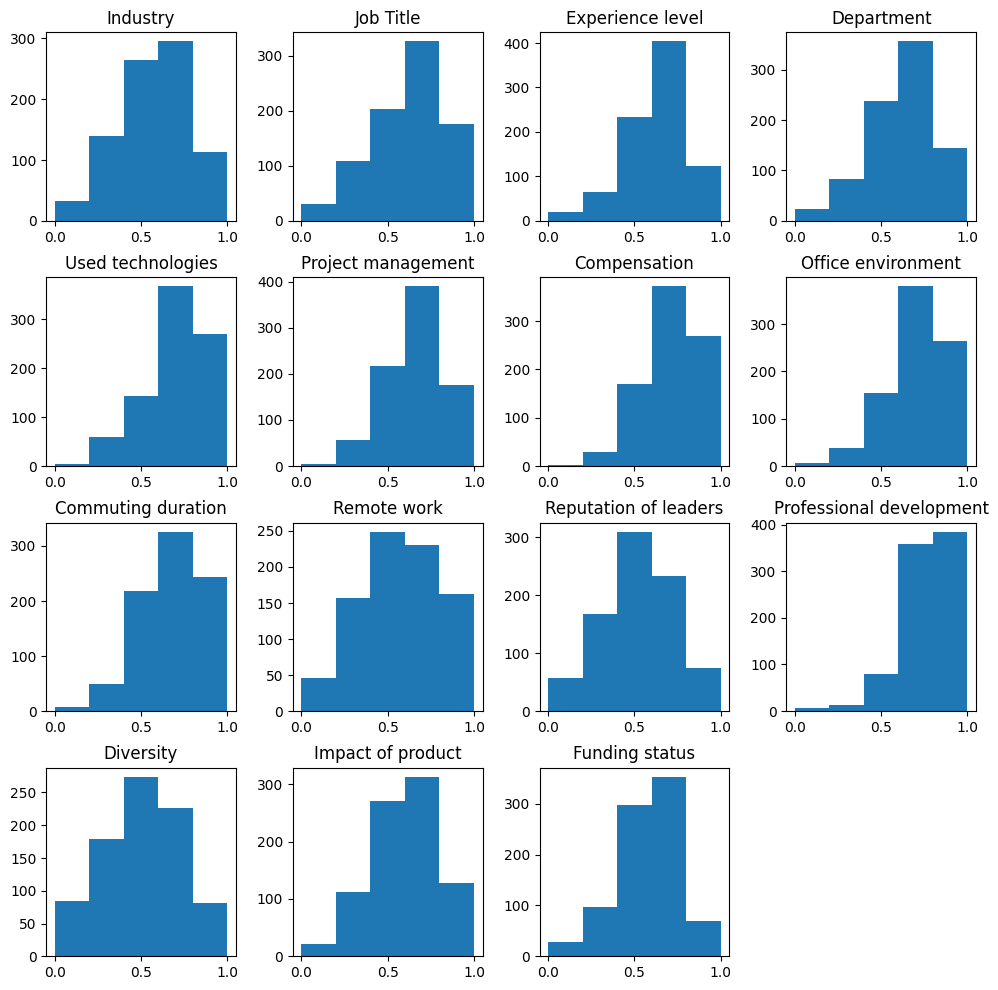

In [48]:
# 
df_q2_top.hist(figsize=(12,12), grid=False, align='mid', bins=5)

array([[<AxesSubplot: title={'center': 'Industry'}>,
        <AxesSubplot: title={'center': 'Job Title'}>,
        <AxesSubplot: title={'center': 'Experience level'}>,
        <AxesSubplot: title={'center': 'Department'}>],
       [<AxesSubplot: title={'center': 'Used technologies'}>,
        <AxesSubplot: title={'center': 'Project management'}>,
        <AxesSubplot: title={'center': 'Compensation'}>,
        <AxesSubplot: title={'center': 'Office environment'}>],
       [<AxesSubplot: title={'center': 'Commuting duration'}>,
        <AxesSubplot: title={'center': 'Remote work'}>,
        <AxesSubplot: title={'center': 'Reputation of leaders'}>,
        <AxesSubplot: title={'center': 'Professional development'}>],
       [<AxesSubplot: title={'center': 'Diversity'}>,
        <AxesSubplot: title={'center': 'Impact of product'}>,
        <AxesSubplot: title={'center': 'Funding status'}>,
        <AxesSubplot: >]], dtype=object)

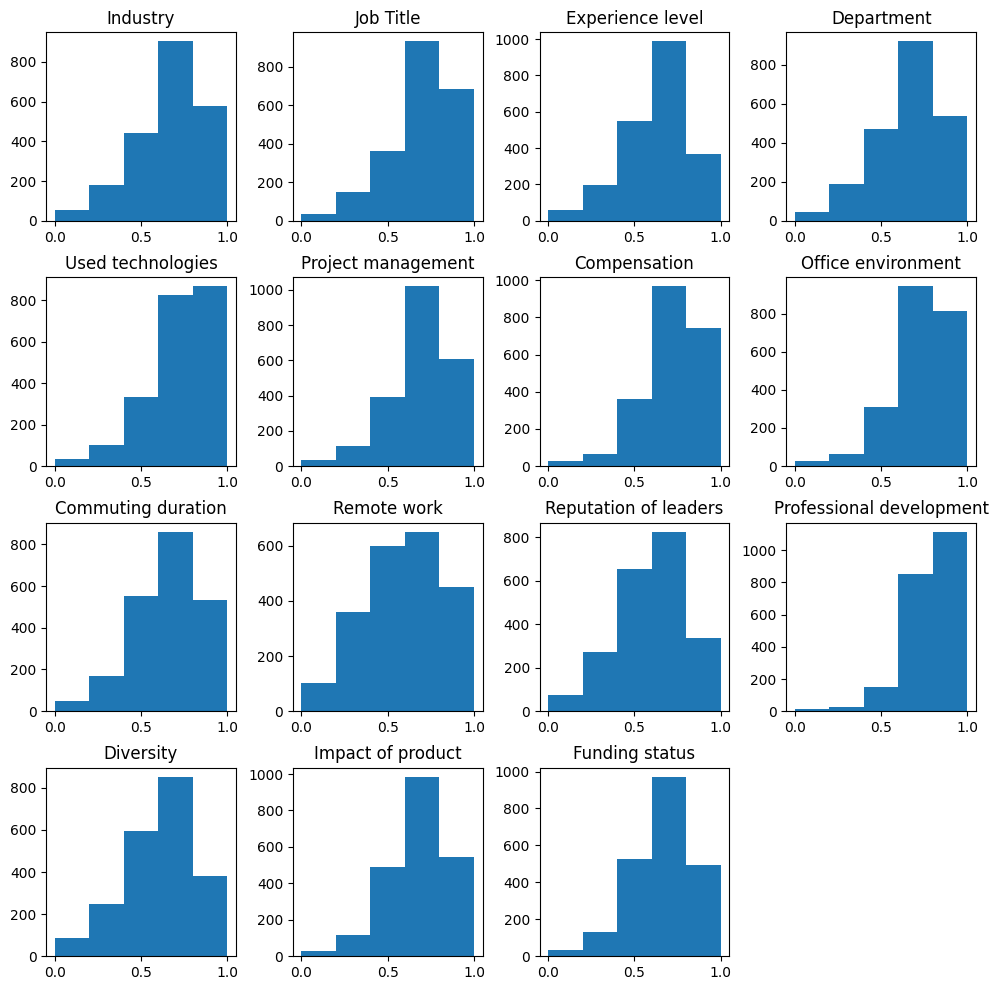

In [49]:
# 
df_q2_bottom.hist(figsize=(12,12), grid=False, align='mid', bins=5)

##Conclusion for question 2

#3. 

##Prepare data for question 3

In [50]:
# 
df_q3_top_corr = df_q2_top.corr(method='pearson')
df_q3_top_corr.head()

,Industry,Job Title,Experience level,Department,Used technologies,Project management,Compensation,Office environment,Commuting duration,Remote work,Reputation of leaders,Professional development,Diversity,Impact of product,Funding status
Industry,1.000000,0.215412,0.145504,0.292695,0.082258,0.144814,0.028978,0.199650,-0.033202,0.029842,0.194332,0.050964,0.145866,0.279557,0.099730
Job Title,0.215412,1.000000,0.279187,0.209772,0.123762,0.108501,0.200242,0.090655,-0.029711,0.086844,0.125086,0.122188,0.090579,0.126216,0.166766
Experience level,0.145504,0.279187,1.000000,0.094305,0.131283,0.065886,0.122442,0.027278,0.007128,0.021840,0.138596,0.123733,0.123929,0.088439,0.122312
Department,0.292695,0.209772,0.094305,1.000000,0.138601,0.285753,0.075414,0.214830,0.005851,-0.023262,0.210822,0.104160,0.163116,0.128040,0.088465
Used technologies,0.082258,0.123762,0.131283,0.138601,1.000000,0.133863,0.173155,0.095199,0.093627,0.031797,0.002424,0.150847,-0.021670,0.034462,0.110559


In [51]:
df_q3_bottom_corr = df_q2_bottom.corr(method='pearson')
df_q3_bottom_corr.head()

,Industry,Job Title,Experience level,Department,Used technologies,Project management,Compensation,Office environment,Commuting duration,Remote work,Reputation of leaders,Professional development,Diversity,Impact of product,Funding status
Industry,1.000000,0.330257,0.253250,0.387439,0.277402,0.278857,0.182884,0.212116,0.112337,0.086302,0.234956,0.242526,0.272350,0.275796,0.208692
Job Title,0.330257,1.000000,0.352442,0.365170,0.300068,0.249470,0.239592,0.164006,0.105887,0.059782,0.172732,0.236566,0.176743,0.181384,0.204204
Experience level,0.253250,0.352442,1.000000,0.250992,0.288954,0.234010,0.270082,0.198262,0.203287,0.144962,0.221909,0.191626,0.204357,0.155828,0.243036
Department,0.387439,0.365170,0.250992,1.000000,0.265527,0.351432,0.179043,0.221221,0.169503,0.111174,0.207334,0.235415,0.241003,0.240261,0.190147
Used technologies,0.277402,0.300068,0.288954,0.265527,1.000000,0.254817,0.219307,0.208001,0.167862,0.117597,0.117766,0.262362,0.153073,0.174860,0.174888


In [52]:
#
df_q3_top_corr.min().min(), df_q3_bottom_corr.min().min()

(-0.045094909901139756, 0.0597816178419939)

##Plot results for question 3

Text(0.5, 1.0, 'Correlation heatmap: Top 5 countries')

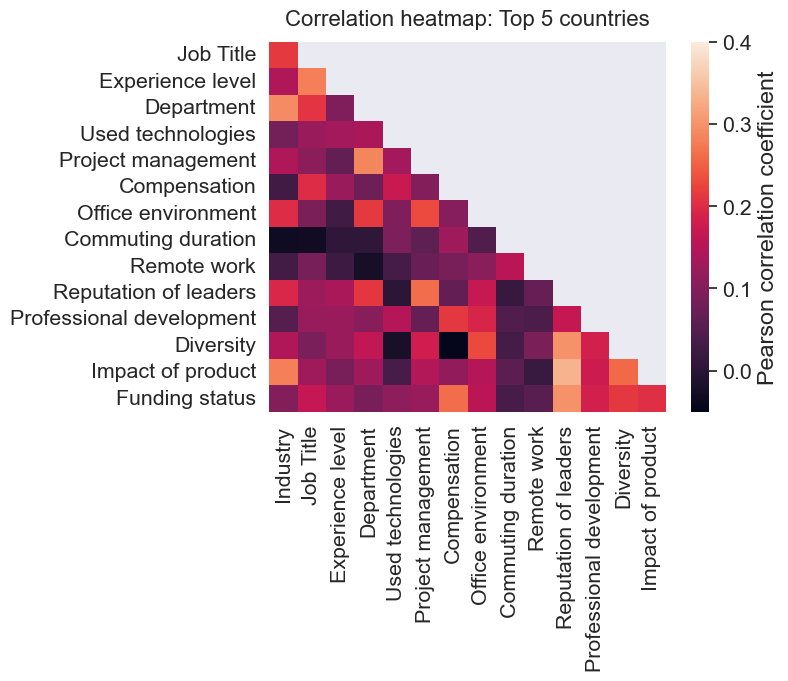

In [53]:
#
sns.set(font_scale=1.4)
df_q3_top_corr.drop(df_q3_top_corr.columns[0], axis=0, inplace=True)
df_q3_top_corr.drop(df_q3_top_corr.columns[-1], axis=1, inplace=True)
mask = np.transpose(np.tri(df_q3_top_corr.shape[0], df_q3_top_corr.shape[1], -1))
heatmap = sns.heatmap(
    df_q3_top_corr,
    vmin=-0.05,
    vmax=0.4,
    mask=mask,
    cbar_kws={'label': 'Pearson correlation coefficient'},
)
heatmap.set_title('Correlation heatmap: Top 5 countries', fontdict={'fontsize': 16}, pad=12)

Text(0.5, 1.0, 'Correlation heatmap: Bottom 5 countries')

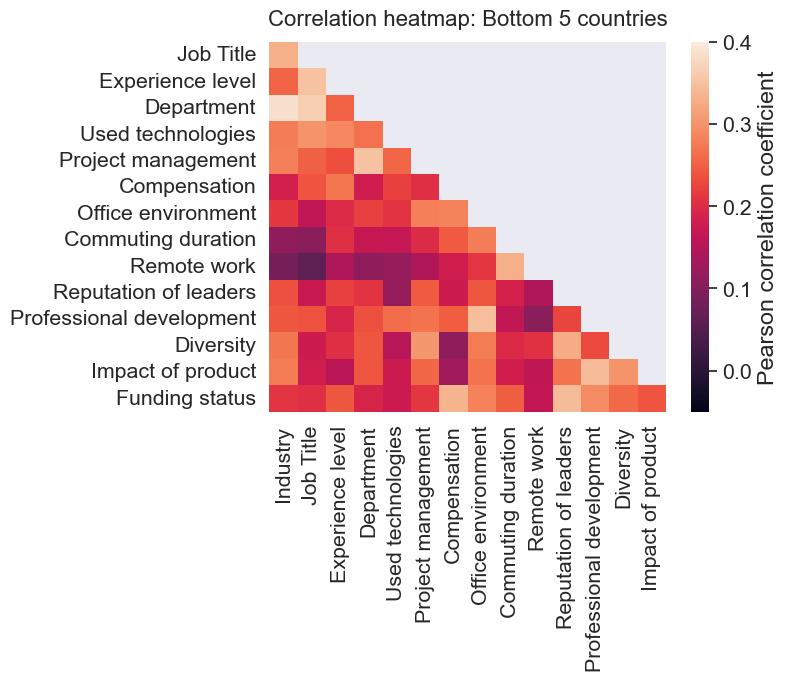

In [54]:
#
sns.set(font_scale=1.4)
df_q3_bottom_corr.drop(df_q3_bottom_corr.columns[0], axis=0, inplace=True)
df_q3_bottom_corr.drop(df_q3_bottom_corr.columns[-1], axis=1, inplace=True)
mask = np.transpose(np.tri(df_q3_bottom_corr.shape[0], df_q3_bottom_corr.shape[1], -1))
heatmap = sns.heatmap(
    df_q3_bottom_corr,
    vmin=-0.05,
    vmax=0.4,
    mask=mask,
    cbar_kws={'label': 'Pearson correlation coefficient'},
)
heatmap.set_title('Correlation heatmap: Bottom 5 countries', fontdict={'fontsize': 16}, pad=12)

##Conclusion for question 3